In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %cd /content/drive/MyDrive/Sun/ML Shock/Final project/eegClassification

In [3]:
import pandas as pd
import numpy as np
import os

In [4]:
# path = '/content/drive/MyDrive/Sun/ML Shock/Final project/eegClassification/'
path = '../'

In [5]:
# all files in path + 'sample_data/train_eegs'
files = os.listdir(path + 'sample_data/train_eegs')
df = pd.read_csv(path + 'sample_data/train.csv')

In [6]:
# select rows from df where 'eeg_id' matches the file name, ignoring the 'parquet' extension
df_data = df[df['eeg_id'].isin([int(f.split('.')[0]) for f in files])]

files_spec = [str(x) for x in df_data[['eeg_id','spectrogram_id']].drop_duplicates()['spectrogram_id'].values]

In [7]:
df_data

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
83,1445780287,0,0.0,4004824,0,0.0,3042959589,22597,Other,0,0,0,0,0,17
84,1445780287,1,6.0,4004824,1,6.0,942569566,22597,Other,0,0,0,0,0,17
85,1445780287,2,16.0,4004824,2,16.0,3752799254,22597,Other,0,0,0,0,0,17
285,3701757135,0,0.0,10530005,0,0.0,4070077333,10111,GPD,0,0,13,0,0,0
286,3701757135,1,6.0,10530005,1,6.0,1184531880,10111,GPD,0,0,13,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40641,2713014975,22,54.0,780890284,22,54.0,2587517241,31386,LRDA,0,0,0,10,0,0
40642,2713014975,23,56.0,780890284,23,56.0,2272756701,31386,LRDA,0,0,0,10,0,0
40643,2713014975,24,58.0,780890284,24,58.0,3429198639,31386,LRDA,0,0,0,10,0,0
40644,2713014975,25,60.0,780890284,25,60.0,1780371091,31386,LRDA,0,0,0,10,0,0


In [8]:
# load parquet files
import pyarrow.parquet as pq

# load parquet files
data = []
for file in files:
    data.append(pq.read_table(path + 'sample_data/train_eegs/' + file))

# load parquet files
data_spec = []
for file in files_spec:
    data_spec.append(pq.read_table(path + 'sample_data/train_spectrograms/' + file+'.parquet'))


In [9]:
cols = data[0].to_pandas().columns.tolist()
# sort alphabetically
cols.sort()
cols

['C3',
 'C4',
 'Cz',
 'EKG',
 'F3',
 'F4',
 'F7',
 'F8',
 'Fp1',
 'Fp2',
 'Fz',
 'O1',
 'O2',
 'P3',
 'P4',
 'Pz',
 'T3',
 'T4',
 'T5',
 'T6']

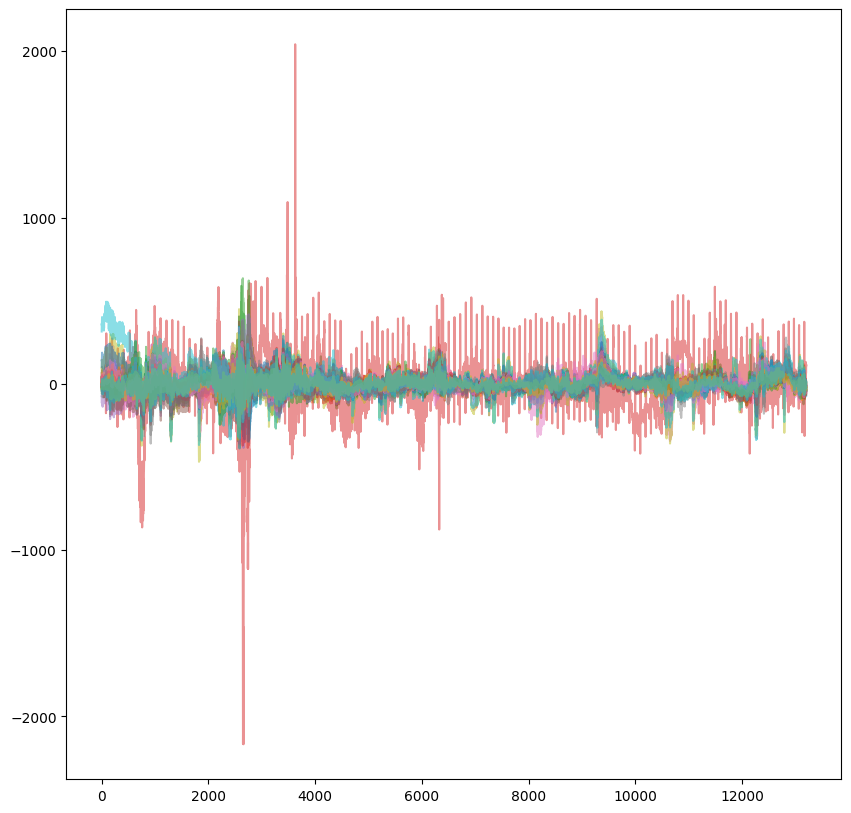

In [10]:
# for data in data plot each column
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# plot 10 random columns
for i in range(20):
    ax.plot(data[0].to_pandas()[cols[i]], '-', alpha=0.5)
plt.show()

In [11]:
cols = [t.split('_')[0] for t in data_spec[0].to_pandas().columns]
# drop duplicates in cols
cols = list(dict.fromkeys(cols))
cols

['time', 'LL', 'RL', 'LP', 'RP']

In [12]:
cols = [t.split('_')[-1] for t in data_spec[0].to_pandas().columns]
# drop duplicates in cols
cols = list(dict.fromkeys(cols))
cols

['time',
 '0.59',
 '0.78',
 '0.98',
 '1.17',
 '1.37',
 '1.56',
 '1.76',
 '1.95',
 '2.15',
 '2.34',
 '2.54',
 '2.73',
 '2.93',
 '3.13',
 '3.32',
 '3.52',
 '3.71',
 '3.91',
 '4.1',
 '4.3',
 '4.49',
 '4.69',
 '4.88',
 '5.08',
 '5.27',
 '5.47',
 '5.66',
 '5.86',
 '6.05',
 '6.25',
 '6.45',
 '6.64',
 '6.84',
 '7.03',
 '7.23',
 '7.42',
 '7.62',
 '7.81',
 '8.01',
 '8.2',
 '8.4',
 '8.59',
 '8.79',
 '8.98',
 '9.18',
 '9.38',
 '9.57',
 '9.77',
 '9.96',
 '10.16',
 '10.35',
 '10.55',
 '10.74',
 '10.94',
 '11.13',
 '11.33',
 '11.52',
 '11.72',
 '11.91',
 '12.11',
 '12.3',
 '12.5',
 '12.7',
 '12.89',
 '13.09',
 '13.28',
 '13.48',
 '13.67',
 '13.87',
 '14.06',
 '14.26',
 '14.45',
 '14.65',
 '14.84',
 '15.04',
 '15.23',
 '15.43',
 '15.63',
 '15.82',
 '16.02',
 '16.21',
 '16.41',
 '16.6',
 '16.8',
 '16.99',
 '17.19',
 '17.38',
 '17.58',
 '17.77',
 '17.97',
 '18.16',
 '18.36',
 '18.55',
 '18.75',
 '18.95',
 '19.14',
 '19.34',
 '19.53',
 '19.73',
 '19.92']

In [13]:
spectrograms = {}
spec_types = ['LL', 'RL', 'LP', 'RP']
# select data from data_spec[0] corresponding to each type
for i, file_name in enumerate(files_spec):
    spec_data = {}
    spec_data['time'] = data_spec[i].to_pandas().filter(regex='time').values
    for spec_type in spec_types:
        spec_data[spec_type] = data_spec[i].to_pandas().filter(regex=spec_type).values

    spectrograms[file_name] = spec_data

In [14]:
x = spectrograms[files_spec[0]]['LL']
x.shape, type(x), x.min(), x.max()

((308, 100), numpy.ndarray, 0.05, 1517.45)

In [19]:
x = spectrograms[files_spec[0]]['time']
files_spec[0], x.min(), x.max(), x.shape, type(x)

('4004824', 1, 615, (308, 1), numpy.ndarray)

In [24]:
for x in data:
    print(x.to_pandas().shape)


(13200, 20)
(12400, 20)
(16800, 20)
(22400, 20)
(21600, 20)
(14800, 20)


In [42]:
#  group df data by 'eeg_id' and 'spectrogram_id' and display  'eeg_label_offset_seconds' and 'spectrogram_label_offset_seconds'
df_gr = df_data.groupby(['eeg_id', 'spectrogram_id'])
dummy = {}
for name, group in df_gr:
    X = group[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds']]
    dummy[name[0]] = len(X)
    print(name)
    print(X)
    print('\n')

(1445780287, 4004824)
    eeg_label_offset_seconds  spectrogram_label_offset_seconds
83                       0.0                               0.0
84                       6.0                               6.0
85                      16.0                              16.0


(1572717157, 15428069)
      eeg_label_offset_seconds  spectrogram_label_offset_seconds
1288                       0.0                               0.0
1289                       6.0                               6.0
1290                      10.0                              10.0
1291                      12.0                              12.0


(2088807520, 198643605)
       eeg_label_offset_seconds  spectrogram_label_offset_seconds
10534                       0.0                               0.0
10535                       4.0                               4.0
10536                       6.0                               6.0
10537                       8.0                               8.0
10538               

In [43]:
data_dict = dict(zip([f.split('.')[0] for f in files], data))

In [44]:
for k in data_dict.keys():
    print(data_dict[k].to_pandas().shape, dummy[int(k)])
    print(data_dict[k].to_pandas().shape[0]/dummy[int(k)])

(13200, 20) 3
4400.0
(12400, 20) 4
3100.0
(16800, 20) 16
1050.0
(22400, 20) 27
829.6296296296297
(21600, 20) 10
2160.0
(14800, 20) 9
1644.4444444444443


Event: ['Other' 'Other' 'Other']


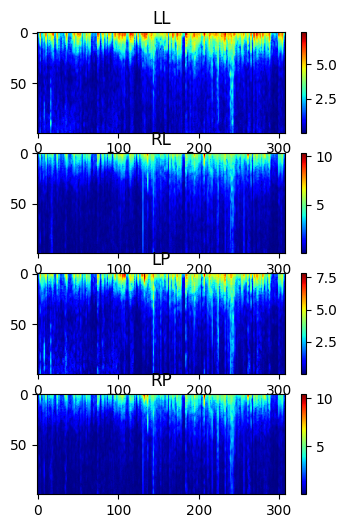

Event: ['GPD' 'GPD' 'GPD' 'GPD' 'GPD' 'GPD' 'GPD' 'GPD' 'GPD']


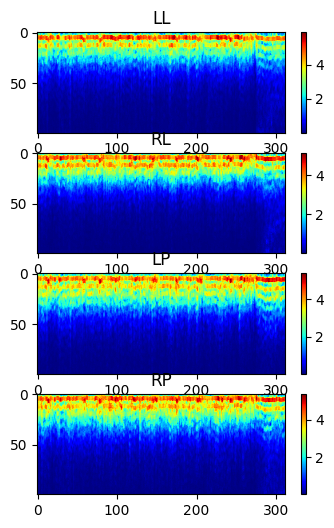

Event: ['LPD' 'LPD' 'LPD' 'LPD']


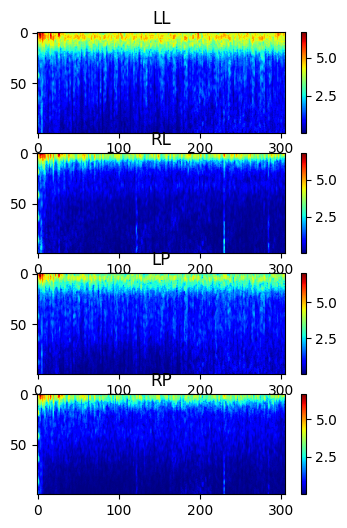

Event: ['Seizure' 'Seizure' 'Seizure' 'Seizure' 'Seizure' 'Seizure' 'Seizure'
 'Seizure' 'Seizure' 'Seizure' 'Seizure' 'Seizure' 'Seizure' 'Seizure'
 'Seizure' 'Seizure']


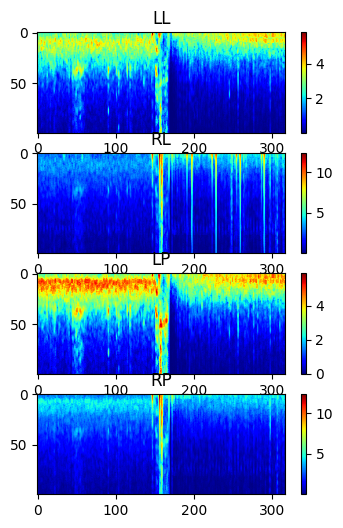

Event: ['Seizure' 'Seizure' 'Seizure' 'Seizure' 'GRDA' 'Seizure' 'Seizure'
 'Seizure' 'Seizure' 'Seizure']


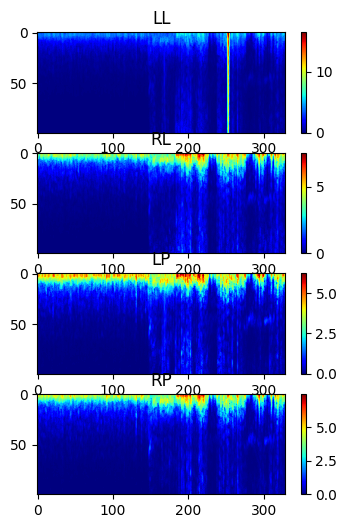

Event: ['LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA'
 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA'
 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA' 'LRDA']


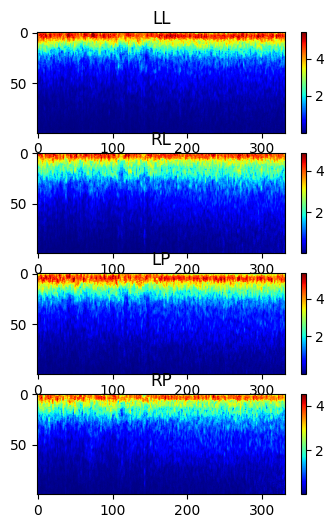

In [17]:
# display spec_types as images
for k in spectrograms.keys():
    event = df_data[df_data['spectrogram_id'] == int(k)]['expert_consensus'].values
    print('Event:', event)
    spec_data = spectrograms[k]
    fig, ax = plt.subplots(4,1, figsize=(4,6))
    for i, spec_type in enumerate(spec_types):
        X = np.log(spec_data[spec_type].T+1)
        ax[i].imshow(X, aspect='auto', cmap='jet')
        ax[i].set_title(spec_type)
        # colorbar
        cbar = plt.colorbar(ax[i].imshow(X, aspect='auto', cmap='jet'), ax=ax[i])
    plt.show()


## Spectrogram preprocessing

Do min max scaling on all spectrograms (how to deal with new data? - cut off after min max scaling?)
 

Check that eeg_label_offset_seconds == spectrogram_label_offset_seconds for all data


How is the EEG time offset used?
